# Part 1.3: Text Vectorization

## Data Loading:
How many different attribute values do you observe in each feature? (e.g. how many
subreddits are there?) Is there any missing or duplicated data? (Referring to textual
features)
b. How does the empirical distribution of the number of characters in each comment look
like? How is the distribution of the number of comments per author? Is the supervised
dataset balanced between male and female? Are there only comments in English? Hint: use
the library langdetect.


In [1]:
!pip install pandas scikit-learn nltk 

     ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.9 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.3/8.9 MB 3.8 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/8.9 MB 6.8 MB/s eta 0:00:02
     ----- ---------------------------------- 1.3/8.9 MB 8.1 MB/s eta 0:00:01
     -------- ------------------------------- 1.9/8.9 MB 10.1 MB/s eta 0:00:01
     ----------- ---------------------------- 2.6/8.9 MB 10.2 MB/s eta 0:00:01
     --------------- ------------------------ 3.3/8.9 MB 11.9 MB/s eta 0:00:01
     ------------------- -------------------- 4.2/8.9 MB 13.6 MB/s eta 0:00:01
     ------------------------ --------------- 5.4/8.9 MB 14.5 MB/s eta 0:00:01
     --------------------------- ------------ 6.0/8.9 MB 14.2 MB/s eta 0:00:01
     ------------------------------ --------- 6.7/8.9 MB 14.2 MB/s eta 0:00:01
     ----------------------------------- ---- 7.9/8.9 MB 15.7 MB


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install langdetect

  Using cached langdetect-1.0.9-py3-none-any.whl



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn matplotlib

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
     ---------------------- --------------- 174.1/294.9 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---- ----------------------------------- 1.0/8.1 MB 31.1 MB/s eta 0:00:01
     ----------- ---------------------------- 2.3/8.1 MB 29.9 MB/s eta 0:00:01
     ------------------- -------------------- 4.0/8.1 MB 31.9 MB/s eta 0:00:01
     -------------------------- ------------- 5.4/8.1 MB 31.5 MB/s eta 0:00:01
     --------------------------------- ------ 6.9/8.1 MB 31.3 MB/s eta 0:00:01
     ---------------------------------------  8.1/8.1 MB 32.4 MB/s eta 0:00:01
     ---------------------------------------- 8.1/8.1 MB 30.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/7.0 MB ? eta -:--:-


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import re
import nltk


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration:
a. How many different attribute values do you observe in each feature? (e.g. how many
subreddits are there?) Is there any missing or duplicated data? (Referring to textual
features)
b. How does the empirical distribution of the number of characters in each comment look
like? How is the distribution of the number of comments per author? Is the supervised
dataset balanced between male and female? Are there only comments in English? Hint: use
the library langdetect.

In [7]:

# loading the supervised data
df = pd.read_csv('../data/data_supervised.csv') #COMMENT
#print(df.head(3))

print(f"Dataframe size: {df.shape}")
m = df.shape

# count differents subreddit topics and authors
n_distinc_authors = len(pd.unique(df['author']))
print(f"There are {n_distinc_authors} distinct authors")

# count distinct subreddit (topics)
n_distinct_subreddit = len(pd.unique(df['subreddit']))
print(f"There are {n_distinct_subreddit} distinct subreddit")

# count distinct body (comments)
n_distinct_body = len(pd.unique(df['body']))
print(f"There are {n_distinct_body} distinct body")

# checking missing values
print(df.isna().sum())

# checking empty stirng
print("Empty bodies: ",(df['body'].str.strip() == "").sum())

# checking duplicate values
n_duplicate = df.duplicated().sum()
print(f"Duplicate values {n_duplicate}")

# count rows with same author and same body
print(df['body'].duplicated().sum())


Dataframe size: (296042, 4)
There are 5000 distinct authors
There are 3468 distinct subreddit
There are 289608 distinct body
author         0
subreddit      0
created_utc    0
body           0
dtype: int64
Empty bodies:  0
Duplicate values 7
6434


count    296042.000000
mean        183.157228
std         327.155573
min           1.000000
25%          41.000000
50%          90.000000
75%         198.000000
max       14271.000000
Name: char_len, dtype: float64


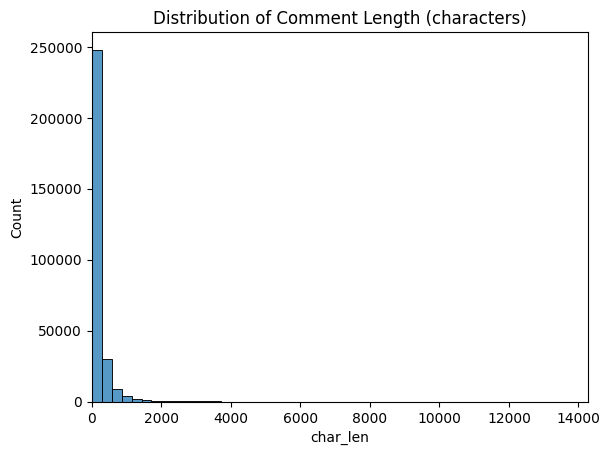

In [ ]:
# collect the number of character for each comment
df['char_len'] = df['body'].str.len()

# describing the empirical distribution
print(df['char_len'].describe())

# plot the histogram
sns.histplot(df['char_len'], bins=50)
plt.title("Distribution of Comment Length (characters)")
plt.xlim(0, 14271) #CCC
plt.show()



count     5000.000000
mean        59.208400
std        298.134567
min          1.000000
25%          5.000000
50%         16.000000
75%         54.000000
max      19534.000000
Name: count, dtype: float64


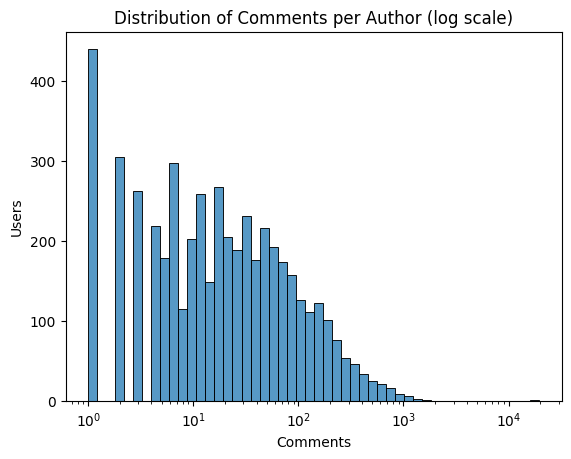

In [14]:
# comments per author
comments_per_author = df['author'].value_counts()
print(comments_per_author.describe())

plt.xlabel("Comments")
plt.ylabel("Users")

# plotting
sns.histplot(comments_per_author, bins=50, log_scale=True)
plt.title("Distribution of Comments per Author (log scale)")
plt.show()

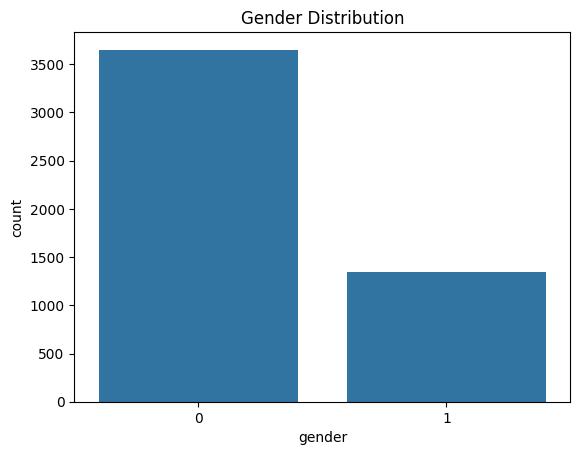

In [ ]:
# reading the target_supervised
target = pd.read_csv('target_supervised.csv')

target['gender'].value_counts()
target['gender'].value_counts(normalize=True)

sns.countplot(data=target, x='gender')
plt.title("Gender Distribution")
plt.show()

#CCC percentage

In [67]:
!pip install fasttext

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4388971 sha256=246a15ae2d168fb718f4206b72b1176cef37d6fe31bf13a0d7935365dd6fea94
  Stored in directory: /home/adrian/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [fasttext]━━━━━━━━━ 2/3 [fasttext]


In [81]:
# Assicurati che tutte le righe siano stringhe
texts = df['body'].fillna('').astype(str).tolist()

# Rimuovi newline e righe troppo corte
clean_texts = [t.replace('\n', ' ').strip() for t in texts]

# Batch prediction
labels, probabilities = model.predict(clean_texts)

# Costruisci la colonna 'lang'
df['lang'] = [
    label[0].replace('__label__','') if len(t) >= 3 else 'unknown'
    for t, label in zip(clean_texts, labels)
]

print(df['lang'].value_counts().head(20))



lang
en         287733
es           1070
it            999
de            858
fr            576
unknown       501
sv            352
eo            316
nl            245
ja            234
pt            227
pl            225
nds           203
da            186
la            185
fi            183
zh            168
ru            152
no            113
hu            102
Name: count, dtype: int64


## Data Cleaning and Text Standardization:
Uniform text formats (e.g., case normalization, Hint: standardize the letters in lower case).
If necessary, clean the comment text (e.g. URLs, subreddit refs, …).
b. Stop words are not contributing much to our ML tasks, such as "the", "a", since they carry
very little information. Take care of these kinds of words.
c. Reduce words to their base or root form using Stemming/Lemmatization. This helps in
reducing inflected words to a common base form. (Hint: Consider using libraries like NLTK
or spaCy for tokenization).


## Point a:
Only for the supervised task (data_supervised.csv): Group and join all comments of the
same author, creating a “new” dataset to be used for the supervised task (Section 2).

## Point b:
As ML algorithms struggle to handle directly the raw textual data. You are required to
convert the text into numerical representations (vectors) through Bag of Words (BoW).

## Point c:
Another way to assign a vector representation to a word is to associate the TF-IDF
representation (Term Frequency-Inverse Document Frequency) to each user/comment.
Can you observe and explain the differences between the numerical representations
generated by BoW and TF-IDF?